----

In [ ]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01; (* λ值 *)

(* 定义无量纲化模型方程 (λ=0) *)
model = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t])
};
Print["模型方程 (λ=0): ", model];

(* 定义无量纲化模型方程 (λ>0) *)
perturbedModel = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};
Print["模型方程 (λ>0): ", perturbedModel];

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[R (1 - Q), {R, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];
Show[linearBranchPlot]

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];
Show[perturbedBranchPlot]

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};

(* 数值模拟 *)
stableSolution = NDSolve[{perturbedModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];
Show[stablePlot]

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
periodicSolution = NDSolve[{perturbedModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];
Show[periodicPlot]


Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[2], 
 
>       RGBColor[0, 0, 1]], Directive[Opacity[1.], AbsoluteThickness[2], 
 
>       RGBColor[1, 0, 0]]}, {X(t) - 食饵, Y(t) - 捕食者}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
-Graphics-
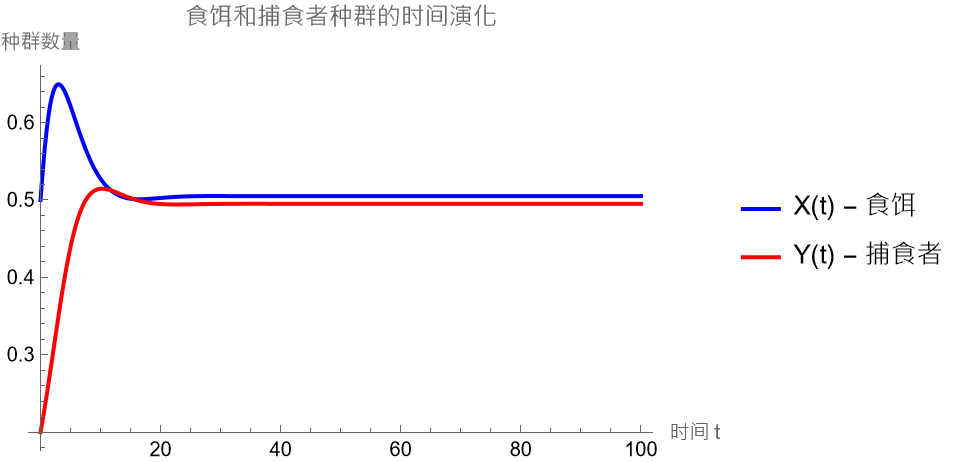
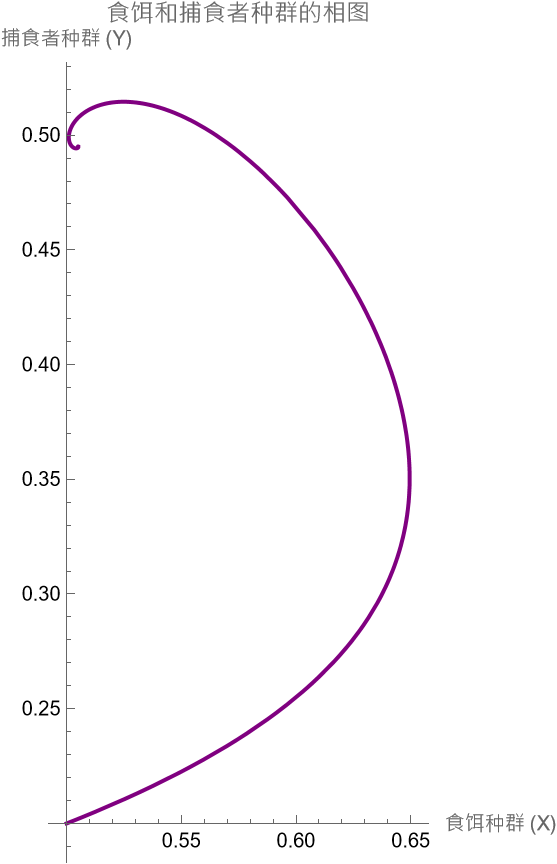

In [ ]:
(* 设置参数 *)
R = 1.0;
S = 3.0;
Q = 0.5;
\[Lambda] = 0.01;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 初始条件 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.2};

(* 求解方程组 *)
sol = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制时间演化图 *)
timeEvolutionPlot = Plot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLegends -> {"X(t) - 食饵", "Y(t) - 捕食者"},
   PlotLabel -> "食饵和捕食者种群的时间演化",
   AxesLabel -> {"时间 t", "种群数量"},
   PlotStyle -> {Blue, Red},
   PlotRange -> All
];
timeEvolutionPlot

(* 绘制相图 *)
phasePlot = ParametricPlot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLabel -> "食饵和捕食者种群的相图",
   AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
   PlotRange -> All,
   PlotStyle -> {Purple}
];
phasePlot


-Graphics-
-Graphics-
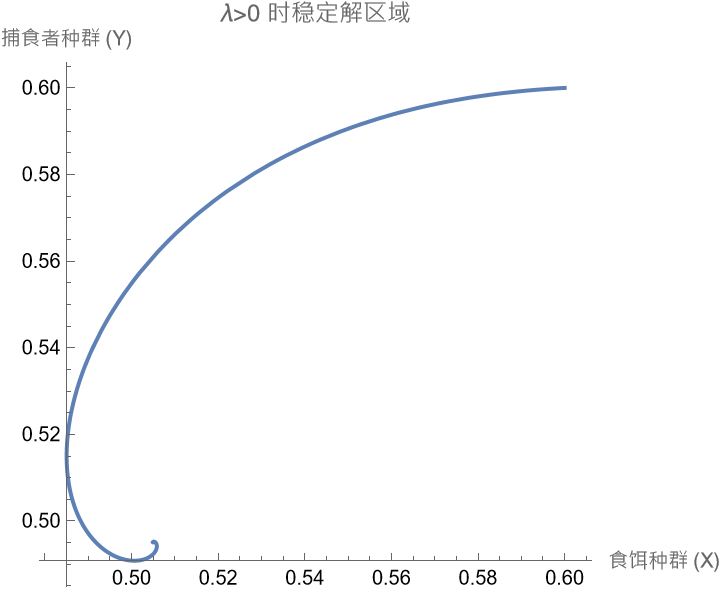
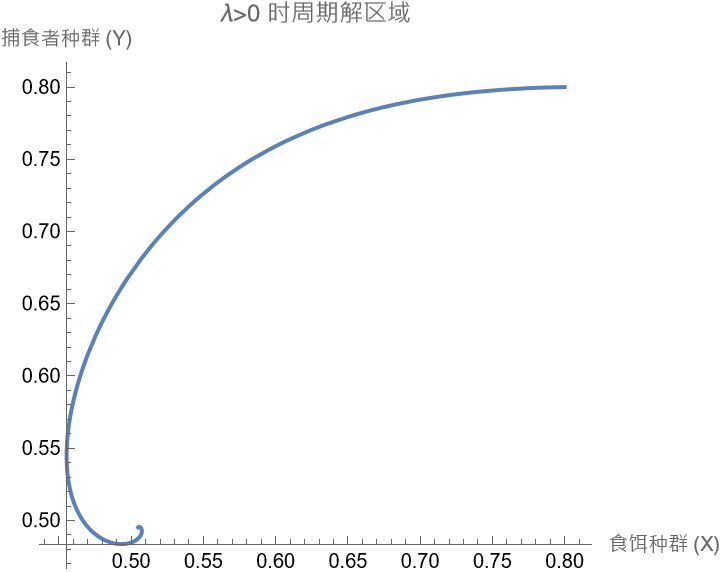

In [ ]:
(* 设置参数 *)
R = 1.0;
S = 1.0;
Q = 0.5;
\[Lambda] = 0.01;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[
  {model, stableInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100},
  AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时稳定解区域"
];
stablePlot

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[
  {model, periodicInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100},
  AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时周期解区域"
];
periodicPlot
